## 2019-09-11: Testing standardize-specta - extrapolated values

### Authors
* Kevin Chu (kevin@velexi.com)

### Notes
* In this Jupyter notebook, we check that standardize spectra is correctly setting values that require extrapolation to NaN.


## Preparations

In [1]:
# --- Imports

# Standard libraries
import os

# External packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SpectraML
from spectra_ml import data
from spectra_ml import io

In [2]:
# --- Configuration Parameters

# Data directories
data_dir = os.environ['DATA_DIR']
splib07a_dir = os.path.join(data_dir, 'ASCIIdata_splib07a')
splib07a_standardized_dir = os.path.join(data_dir, 'ASCIIdata_splib07a.standardized')
spectrometers_dir = os.path.join(data_dir, 'spectrometers')

# Spectrometers
spectrometers = io.load_spectrometers(spectrometers_dir, splib07a_dir)

# Spectra metadata file
metadata_path = os.path.join(splib07a_standardized_dir, 'spectra-metadata.csv')

# Test spectrum
test_spectrum_id = 8927
spectrometer = 'ASDFR'

test_spectrum_id = 6792
spectrometer = 'BECK'

test_spectrum_id = 8943
spectrometer = 'ASDFR'

test_spectrum_id = 8933
spectrometer = 'ASDFR'

In [3]:
# --- Preparations

# Load spectra metadata
metadata = pd.read_csv(metadata_path, sep='|')

# Test Spectrum
raw_spectrum_path = os.path.join(splib07a_dir,
    metadata[metadata['spectrum_id']==test_spectrum_id].iloc[0]['raw_data_path'])
standardized_spectrum_path = os.path.join(splib07a_standardized_dir, '8927.csv')

# Print paths
print("Raw spectrum path:", raw_spectrum_path)
print("Standardized spectrum path:", standardized_spectrum_path)

Raw spectrum path: /Users/kchu/1-Work/1-Serendipity-Research/projects/research/ML-Applications/SpectraML/spectra-ml/data/ASCIIdata_splib07a/ChapterM_Minerals/splib07a_Psilomelane_HS139.2B_ASDFRb_AREF.txt
Standardized spectrum path: /Users/kchu/1-Work/1-Serendipity-Research/projects/research/ML-Applications/SpectraML/spectra-ml/data/ASCIIdata_splib07a.standardized/8927.csv


## Read and Plot Spectra Data

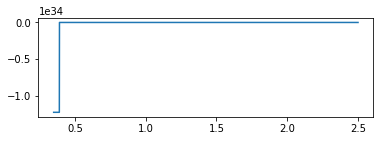

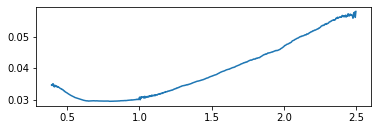

In [4]:
# --- Read spectra data

raw_spectrum = pd.read_csv(raw_spectrum_path)
spectrometer_wavelengths = spectrometers[spectrometer]['x-axis']['wavelength']['values']

standardized_spectrum = pd.read_csv(standardized_spectrum_path)
standardized_wavelengths = standardized_spectrum.wavelength

# --- Plot raw and filled-in spectra

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(spectrometer_wavelengths, raw_spectrum)
plt.show()
    
plt.subplot(2, 1, 2)
plt.plot(standardized_wavelengths, standardized_spectrum.reflectance)
    
plt.show()

## Validate Spectrum Values

In [5]:
# Check that there are NaN values are only at ends of wavelength range.
print(standardized_spectrum[standardized_spectrum['reflectance'].isnull()])

   wavelength  reflectance
0    0.370000          NaN
1    0.372132          NaN
2    0.374264          NaN
3    0.376396          NaN
4    0.378529          NaN
5    0.380661          NaN
6    0.382793          NaN
7    0.384925          NaN
8    0.387057          NaN
9    0.389189          NaN
